In [1]:
import tensorflow as tf
import meta
%pylab inline
from matplotlib.patches import Rectangle
import numpy as np
from PIL import *
from matplotlib import pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
filename = '/home/olle/PycharmProjects/digits/data/test/test.tfrecords'
filename_queue = tf.train.string_input_producer([filename], num_epochs=None)

In [3]:
reader = tf.TFRecordReader()
_, serialized_example = reader.read(filename_queue)
features = tf.parse_single_example(
  serialized_example,
  features={
      'height': tf.FixedLenFeature([], tf.int64),
      'width': tf.FixedLenFeature([], tf.int64),
      'depth': tf.FixedLenFeature([], tf.int64),
      'label': tf.FixedLenFeature([], tf.int64),
      'image_raw': tf.FixedLenFeature([], tf.string)
  })

In [4]:
image = tf.decode_raw(features['image_raw'], tf.uint8)
label = features['label']
# image = tf.reshape(image, [64, 64, 3])


In [5]:
sess = tf.InteractiveSession()
coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(coord=coord)

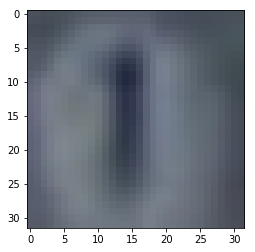

In [14]:
(image_val_full) = sess.run([image])

image_val = image_val_full[0].reshape(32,32,3)

img = Image.fromarray(image_val, 'RGB')

plt.imshow(img, interpolation='nearest')
plt.show()

[array([75, 82, 92, ..., 73, 77, 86], dtype=uint8)]